In [3]:
from StereoAlgoCS6476 import *
import os
import time
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import sys
import cv2

# dataset = './dataset-2005/'
# dmax = {
#     'Art': 80,
#     'Books': 90,
#     'Dolls': 110,
#     'Laundry': 100,
#     'Moebius': 100,
#     'Reindeer': 100
# }

dataset = './dataset-2014/'
dmax = { 
    'Backpack-imperfect' : 260,
    'Bicycle1-imperfect' : 180,
    'Flowers-imperfect' : 640,
    'Sword2-imperfect' : 370,
    'Umbrella-imperfect': 250

}
resize_scale = 0.25
left_images, right_images = load_image(dataset, scale = resize_scale )
img_num = len(left_images)

In [12]:
######## SSD


for key, value in dmax.items():
    value = int(value * resize_scale)
    start = time.time()
    labels = ssd_(left_images[key], right_images[key], window_size=5, search_depth= value)
    lbp_time = time.time() - start    
    labels = disp2jet(labels)
    labels = cv2.cvtColor(labels, cv2.COLOR_BGR2RGB)
    cv2.imwrite('./myoutput/' + str(key) + '_ssd' + '.png', labels )

    

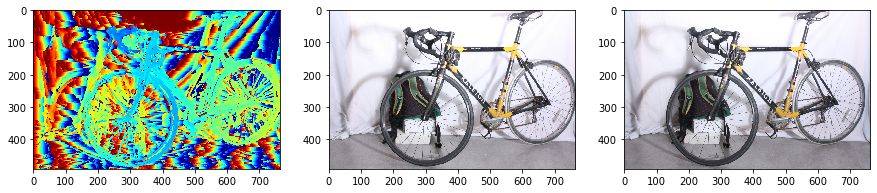

In [8]:
######## SSD Example


data = 'Bicycle1-imperfect'
labels = ssd_(left_images[data], right_images[data], window_size=5, search_depth= int(dmax[data]*resize_scale))
labels = disp2jet(labels)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(cv2.cvtColor(labels, cv2.COLOR_BGR2RGB))
axs[1].imshow(cv2.cvtColor(left_images[data], cv2.COLOR_BGR2RGB), cmap='gray')
axs[2].imshow(cv2.cvtColor(right_images[data], cv2.COLOR_BGR2RGB), cmap='gray')
plt.show()

In [9]:
######### Loopy Belief Propagation

iters = 30

for key, value in dmax.items():
    labels, energy = Loopy_BP_(left_images[key], right_images[key], max_disp= int(dmax[key]*resize_scale), max_iter=iters, tau=10, smooth_weight=10)
    labels = disp2jet(labels)
    labels = cv2.cvtColor(labels, cv2.COLOR_BGR2RGB)
    cv2.imwrite('./myoutput/' + str(key) + '_iter_loopyBP_' + str(iters) + '.png', labels )

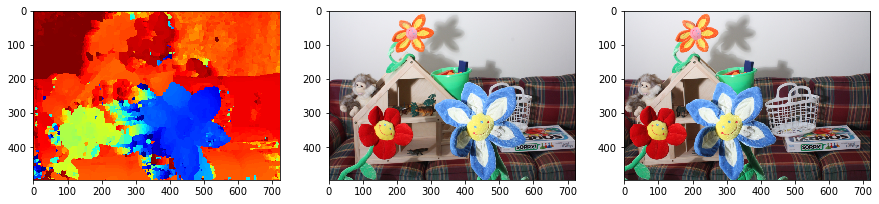

In [11]:
######## LBP Example

data = 'Flowers-imperfect'
iters = 30
labels, energy = Loopy_BP_(left_images[data], right_images[data], max_disp= int(dmax[data]*resize_scale), max_iter=iters, tau=10, smooth_weight=10)
labels = disp2jet(labels)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(cv2.cvtColor(labels, cv2.COLOR_BGR2RGB))
axs[1].imshow(cv2.cvtColor(left_images[data], cv2.COLOR_BGR2RGB), cmap='gray')
axs[2].imshow(cv2.cvtColor(right_images[data], cv2.COLOR_BGR2RGB), cmap='gray')
plt.show()


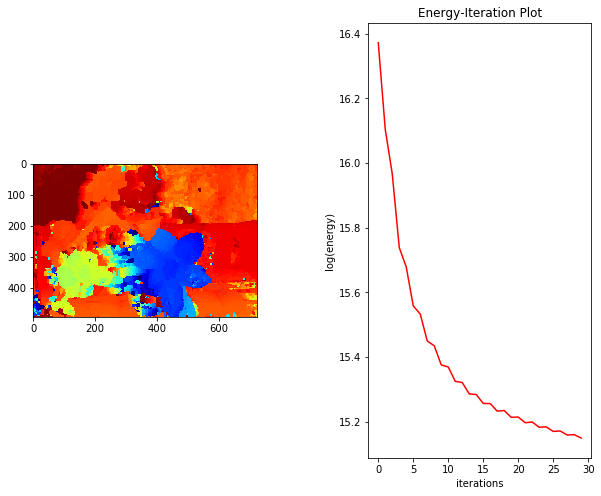

In [13]:
#### Energy Plot

plt.figure(figsize=(10, 8))
plt.subplots_adjust(wspace=0.5)
plt.subplot(121)
plt.imshow(cv2.cvtColor(labels, cv2.COLOR_BGR2RGB))
plt.subplot(122)
plt.plot(np.log(energy), 'r')
plt.xlabel('iterations')
plt.ylabel('log(energy)')
plt.title('Energy-Iteration Plot')
plt.show()